In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'panas'

In [2]:
pip install pandas

  Using cached pandas-1.5.2-cp310-cp310-macosx_11_0_arm64.whl (10.8 MB)
  Using cached pytz-2022.6-py2.py3-none-any.whl (498 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

  Using cached matplotlib-3.6.2-cp310-cp310-macosx_11_0_arm64.whl (7.2 MB)
  Using cached contourpy-1.0.6-cp310-cp310-macosx_11_0_arm64.whl (225 kB)
  Using cached Pillow-9.3.0-cp310-cp310-macosx_11_0_arm64.whl (2.9 MB)
  Using cached kiwisolver-1.4.4-cp310-cp310-macosx_11_0_arm64.whl (63 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [10]:
data.shape

(100, 3)

In [27]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figesize=(20, 10))
ax.scatter(positive['Exam 1'],
           positive['Exam 2'],
           s=50,
           c='b',
           marker='o',
           label='Admitted')
ax.scatter(negative['Exam 1'],
           negative['Exam 2'],
           s=50,
           c='r',
           marker='x',
           label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

AttributeError: Figure.set() got an unexpected keyword argument 'figesize'

In [ ]:
# 定义代价函数

In [30]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

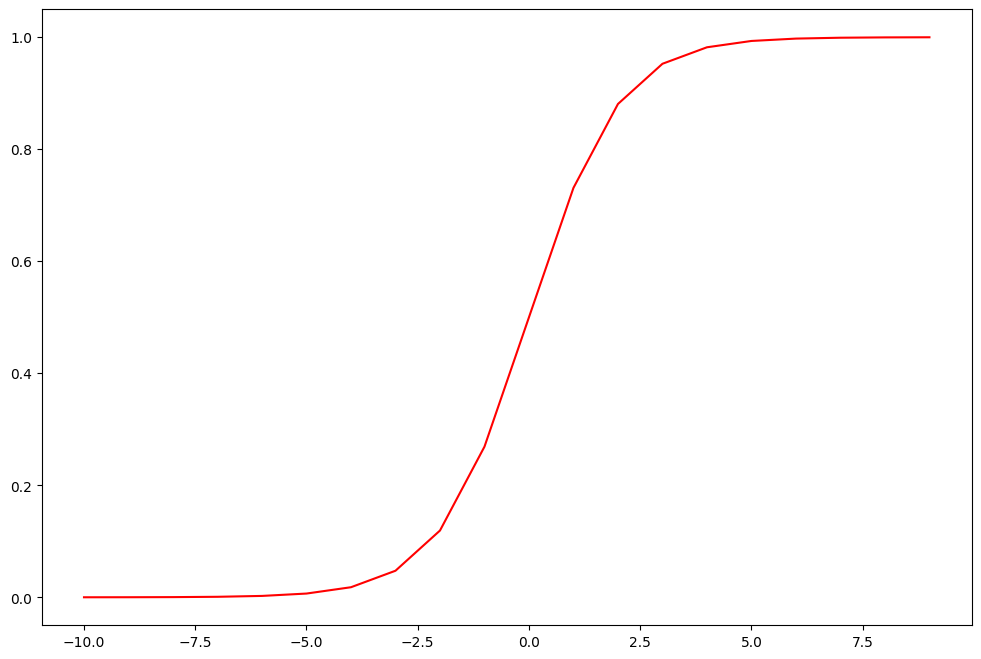

In [33]:
nums = np.arange(-10, 10, step = 1)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(nums, sigmoid(nums), 'r')
plt.show()

In [34]:
def cost(w, X, y):
    w = np.matrix(w)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * w.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * w.T)))
    return np.sum(first - second) / (len(X))

In [45]:
#data.insert(0, 'Ones', 1)
cols = data.shape[1]
X = data.iloc[:, 0:cols - 1]
y = data.iloc[:, cols - 1:cols]
X = np.array(X.values)
y = np.array(y.values)
w = np.zeros(3)
data.head()

,Ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [46]:
X.shape, w.shape, y.shape

((100, 3), (3,), (100, 1))

In [47]:
cost(w, X, y)

0.6931471805599453

In [51]:
def gradient(w, X, y):  # 定义梯度
    w = np.matrix(w)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(w.ravel().shape[1])
    grad = np.zeros(parameters)
    error = sigmoid(X * w.T) - y
    for i in range(parameters):
        term = np.multiply(error, X[:, i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [52]:
gradient(w, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [53]:
pip install scipy

  Using cached scipy-1.9.3-cp310-cp310-macosx_12_0_arm64.whl (28.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [55]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=w, fprime=gradient, args=(X, y))
result

  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   2.71082898E+02
    1    3  6.318123602631536E-01   7.89087138E-01
    2    5  5.892425222593011E-01   7.39226590E+01
    3    7  4.227824082768085E-01   1.85265802E+01
    4    9  4.072926971534283E-01   1.68671130E+01
    5   11  3.818854920309407E-01   1.07735097E+01
    6   13  3.786234896709935E-01   2.31584926E+01
tnc: stepmx = 1000
    7   16  2.389268303582261E-01   3.00822039E+00
    8   18  2.047203891858869E-01   1.52227714E-01
    9   20  2.046713899360368E-01   6.62495142E-02
   10   22  2.035303163190396E-01   9.30780772E-04
tnc: fscale = 32.7775
   11   24  2.035293522100511E-01   8.07207683E-06
   12   26  2.035251114039714E-01   1.80213850E-04
   13   28  2.034984103693545E-01   5.02836184E-04
   14   30  2.034978377466289E-01   9.88454531E-06
   15   32  2.034977904843622E-01   3.76915430E-06
   16   34  2.034977386092095E-01   1.93988086E-05
   17   36  2.034977015894744E-01   2.42606408E-13


(array([-25.16131867,   0.20623159,   0.20147149]), 36, 0)

In [56]:
cost(result[0], X, y)

0.2034977015894744

In [57]:
def predict(w, X):
    probability = sigmoid(X * w.T)
    return [1 if x>= 0.5 else 0 for x in probability]

In [60]:
w_win = np.matrix(result[0])
predictions = predict(w_win, X)
correct =[
    1 if ((a == 1 and b == 1) or (a == 0 and b ==0)) else 0
    for (a, b) in zip(predictions, y)
]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 89%


In [ ]:
#  进行正则化回归

In [64]:
path = 'ex2data2.txt'
data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


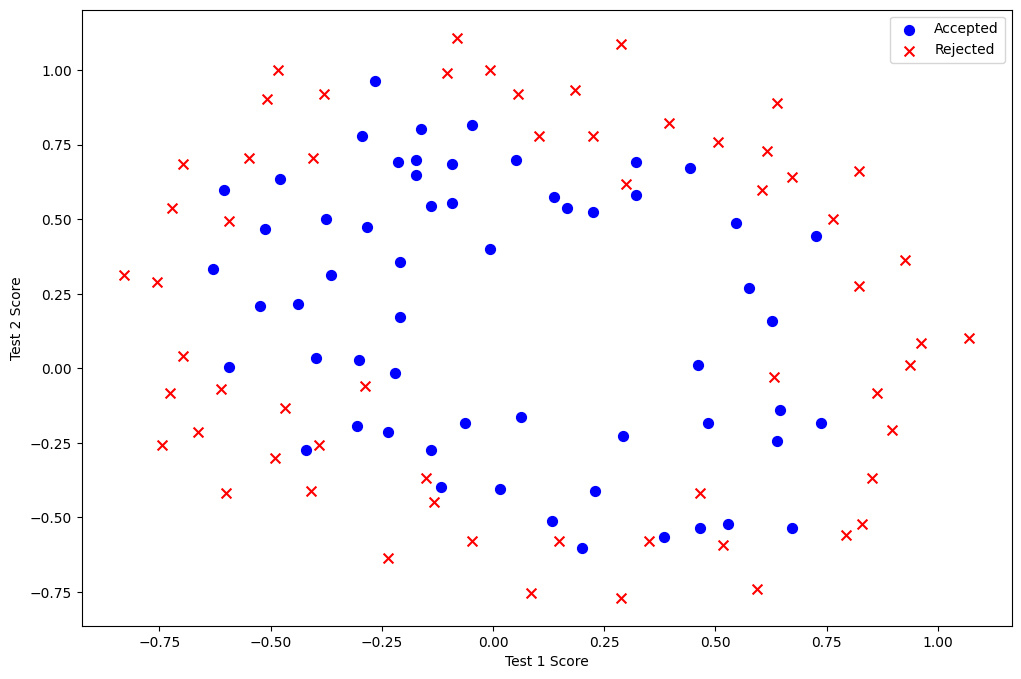

In [69]:
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(positive['Test 1'],
           positive['Test 2'],
           s=50,
           c='b',
           marker='o',
           label='Accepted')
ax.scatter(negative['Test 1'],
           negative['Test 2'],
           s=50,
           c='r',
           marker='x',
           label='Rejected')
ax.legend()  # 会出现右上角的参考样例
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
plt.show()

In [71]:
#构建多项式特征
degree = 5
x1 = data2['Test 1']
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        data2['F' + str(i) + str(j)] = np.power(x1, i - j) * np.power(x2, j)

data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)
data2.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [72]:
# 定义正则化函数
def costReg(w, X, y, learningRate):
    w = np.matrix(w)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * w.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * w.T)))
    reg = (learningRate /
          (2 * len(X))) * np.sum(np.power(w[:, 1:w.shape[1]], 2))
    return np.sum(first - second) / len(X) +reg

In [73]:
def gradientReg(w, X, y, learingRate):
    w = np.matrix(w)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(w.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * w.T) - y
    for i in range(parameters):
        term = np.multiply(error, X[:, i])
        
        if(i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) /len(X) + (
                (learningRate) / len(X)) * w[:, i])
    return grad

In [74]:
# 初始化变量
cols = data2.shape[1]
X2 = data2.iloc[:, 1:cols]
y2 = data2.iloc[:, 0:1]
X2 = np.array(X2.values)
y2 = np.array(y2.values)
w2 = np.zeros(11)

In [83]:
learningRate = 1

In [86]:
costReg(w2, X2, y2, learningRate)

0.6931471805599454

In [87]:
gradientReg(w2, X2, y2, learningRate)

array([0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
       0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
       0.00309594])

In [90]:
result2 = opt.fmin_tnc(func=costReg, x0=w2, fprime=gradientReg, args=(X2, y2, learningRate))
result2

  NIT   NF   F                       GTG
    0    1  6.931471805599454E-01   5.27766673E-03
    1    6  6.236965142619159E-01   1.11875144E-04
tnc: fscale = 94.5438
    2   11  6.226856679028266E-01   3.17607256E-07
    3   14  6.226825655513781E-01   4.27903201E-09
tnc: fscale = 15287.2
    4   19  6.226824391039293E-01   8.26306175E-12
tnc: fscale = 347880
tnc: |fn-fn-1] = 2.7521e-10 -> convergence
    5   22  6.226824388287189E-01   3.20903109E-13
tnc: Converged (|f_n-f_(n-1)| ~= 0)


(array([ 0.53010247,  0.29075567, -1.60725764, -0.58213819,  0.01781027,
        -0.21329508, -0.40024142, -1.3714414 ,  0.02264304, -0.9503358 ,
         0.0344085 ]),
 22,
 1)

In [91]:
w_min = np.matrix(result2[0])
predictions = predict(w_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for(a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 78%


In [99]:
 pip install scikit-learn

  Using cached scikit_learn-1.1.3-cp310-cp310-macosx_12_0_arm64.whl (7.7 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
Note: you may need to restart the kernel to use updated packages.


In [100]:
from sklearn import linear_model # 直接调用sklearn库
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(X2, y2.ravel())

LogisticRegression()

In [101]:
model.score(X2, y2)

0.6610169491525424